In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
from sklearn.datasets import load_diabetes
df = load_diabetes ()
print (df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [27]:
X_FULL = df.data
Y = df.target

In [28]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

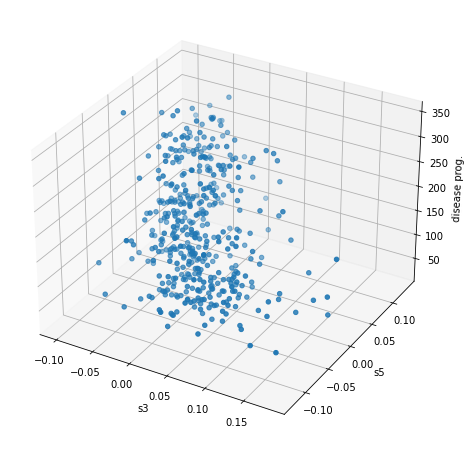

In [29]:
# Veo la forma de los datos
import seaborn as sns
C1 = 6; C2 = 8
x1 = X_FULL[:, C1]
y1 = X_FULL[:, C2]
z1 = Y
plt.figure(figsize=(8,8))
axes = plt.axes(projection='3d')
axes.scatter3D(x1, y1, z1)
axes.set_xlabel(df.feature_names[C1])
axes.set_ylabel(df.feature_names[C2])
axes.set_zlabel('disease prog.')
plt.show()

In [30]:
# segmento el X de interes
X = X_FULL # [:, 3:7]
X.shape

(442, 10)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [32]:
X.shape, Y.shape

((442, 10), (442,))

In [60]:
class MultipleRegressor():
    def __init__ (self, l_rate, n_features):
        self.l_rate = l_rate
        self.n_features = n_features
        self.w = np.zeros(n_features)
        self.b = 0
        self.loss_per_epoch = []
        
    def fit (self, X, Y, n_epochs=1000):
        M = X.shape[0]
        for n in range(n_epochs):
            f = np.dot(X, self.w) + self.b # f.shape = (M, )
            dW = (1 / M) * (2 * np.dot(X.T, (f - Y))) # dW.shape = (n_features, )
            dB = (1 / M) * (2 * np.sum(f - Y)) # dB.shape = numero
            self.w -= self.l_rate * dW
            self.b -= self.l_rate * dB
            # asumo que y_test ya esta definido
            mypreds = self.predict(x_test) 
            self.loss_per_epoch.append(mean_squared_error(mypreds, y_test))
            
    def predict(self, x): 
        return np.dot(x, self.w) + self.b

In [70]:
my_model = MultipleRegressor(l_rate=0.5, n_features=x_train.shape[1])
my_model.fit(x_test, y_test, n_epochs=2000)

In [71]:
mypreds = my_model.predict(x_test) 
mean_squared_error(mypreds, y_test)

3114.472292655619

Text(0.5, 1.0, 'Loss(n_epoch) & l_rate=0.5')

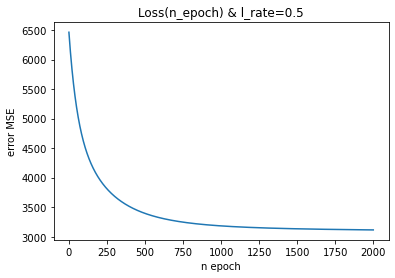

In [77]:
plt.plot(range(0, len(my_model.loss_per_epoch)), my_model.loss_per_epoch)
plt.xlabel('n epoch')
plt.ylabel('error MSE')
plt.title (f'Loss(n_epoch) & l_rate={my_model.l_rate}')

In [73]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(x_train, y_train)

LinearRegression()

In [74]:
my_model.w

array([-378.37267806, -147.2646243 ,  599.69272736,  283.26667759,
         20.99008234,  -61.73465653, -177.48409442,  -75.20557529,
        620.46135304,  192.02493065])

In [75]:
sk_model.coef_

array([  74.93077046, -270.65950247,  492.86515089,  345.98770223,
       -757.36614313,  390.17854334,   95.54366842,  270.62093082,
        688.18678693,   29.00072833])

In [76]:
sk_preds = sk_model.predict(x_test)
mean_squared_error(sk_preds, y_test)

3631.7832035556066